### What is Linear Discriminant Analysis (LDA)?

Linear Discriminant Analysis (LDA) is a powerful technique used in statistics and machine learning for dimensionality reduction and classification. It is particularly effective in problems where the data belongs to multiple classes and the goal is to separate these classes by projecting the data into a lower-dimensional space. 

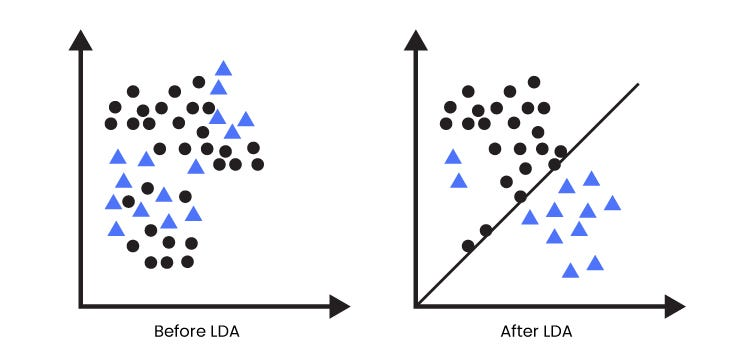

#### How Does LDA Work?

Suppose we have a dataset of iris flowers with four features: sepal length, sepal width, petal length, and petal width. We want to classify these flowers into three species: Setosa, Versicolor, and Virginica.

### Steps:

- **Data Preparation:** Let’s say we have 150 iris samples with four features each, and the samples are evenly distributed among the three species.
- **Compute Class Statistics:** Calculate the mean and covariance matrix for each feature in each class. This gives us three mean vectors and three covariance matrices (one for each class).
- **Compute Between-Class and Within-Class Scatter Matrices:** Calculate the between-class scatter matrix by computing the differences between the mean vectors of each class and the overall mean, and then summing these outer products. Calculate the within-class scatter matrix by summing the covariance matrices of each class, weighted by the number of samples in each class.
- **Compute Eigenvectors and Eigenvalues:** Solve the generalized eigenvalue problem using the between-class scatter matrix and the within-class scatter matrix. This gives us a set of eigenvectors and their corresponding eigenvalues.
- **Select Discriminant Directions:** Sort the eigenvectors by their eigenvalues in descending order. Let’s say we want to reduce the dimensionality to 2, so we select the top two eigenvectors.
- **Transform Data:** Project the original iris data onto the two selected eigenvectors. This gives us a new two-dimensional representation of the data.
- **Classification:** In the reduced-dimensional space, we can use a classifier (e.g., k-nearest neighbors) to classify the iris flowers into one of the three species based on their positions in the reduced space.

In [5]:
import numpy as np
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


C:\Users\40107588\AppData\Local\Temp\ipykernel_16560\774800323.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


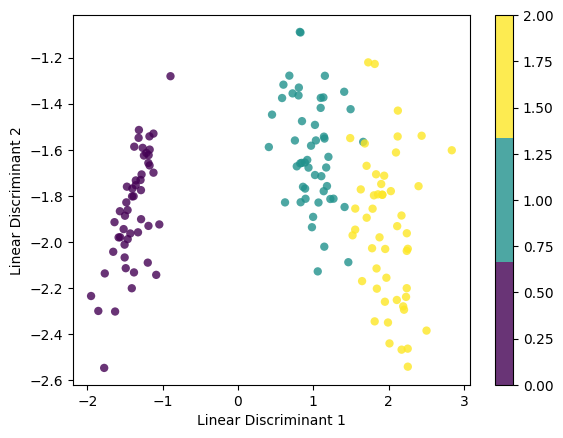

In [6]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    data = datasets.load_iris()
    X, y = data.data, data.target

    # Project the data onto the 2 primary linear discriminants
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()